In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
#import pyDOE
from sepia.SepiaModel import SepiaModel
from sepia.SepiaData import SepiaData
import sepia.SepiaPlot as SepiaPlot

In [3]:
import os
datadir = os.getcwd()+"/data/ball_drop_2/"
# experimental data
with open(datadir+'fieldDat15x6gparam.txt','r') as f:
    field_data = np.loadtxt(f)
with open(datadir+'desNative4x2Rrho.txt','r') as f:
    x = np.loadtxt(f) # x = {R, rho_ball}
x_obs = x

y_obs = [np.array(field_data[0:3,4]),np.array(field_data[3:6,4]),\
         np.array(field_data[6:12,4]),np.array(field_data[12:,4])]
h_obs = [np.array(field_data[0:3,3]),np.array(field_data[3:6,3]),\
         np.array(field_data[6:12,3]),np.array(field_data[12:,3])]# observed heights

# simulated data
with open(datadir+'desNative80x4Cg.txt','r') as f:
    sim_data = np.loadtxt(f)
x_sim = sim_data[:,0:2] # x = {R, rho_ball}
t_sim = sim_data[:,2:4] # t = {C, g}
with open(datadir+'simHeights101x1','r') as f:
    h_sim = np.loadtxt(f)
with open(datadir+'sims101x80Cg.txt','r') as f:
    y_sim = np.loadtxt(f).T

# create sepia data object
data = SepiaData(x_sim = x_sim, t_sim = t_sim, y_ind_sim = h_sim, y_sim = y_sim,\
                 x_obs = x, y_obs = y_obs, y_ind_obs = h_obs)

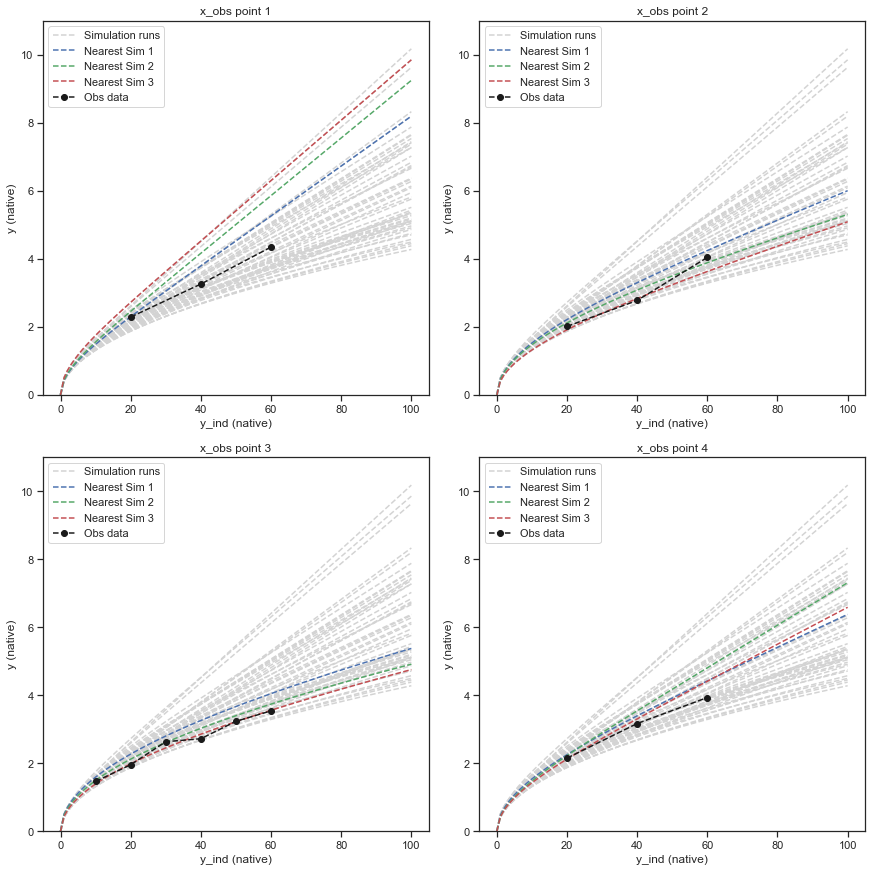

In [4]:
data.plot_data(x_min = -5, x_max = 105, y_min = 0, y_max = 11)

(Text(0, 0.5, 'C'), Text(0.5, 1.0, 'Simulation Design'))

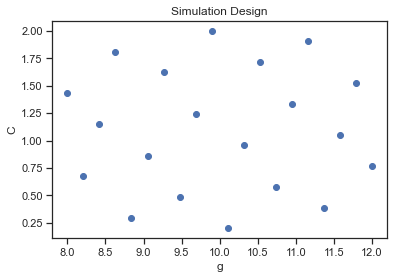

In [5]:
plt.scatter(t_sim[0:20,1],t_sim[0:20,0])
plt.xlabel("g");plt.ylabel("C"),plt.title("Simulation Design")

In [6]:
data.transform_xt()
data.standardize_y()

(5,)


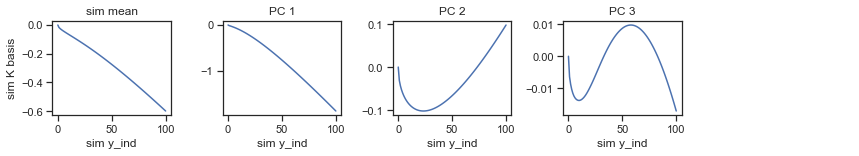

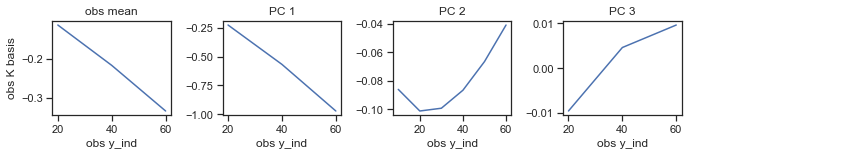

In [7]:
data.create_K_basis(3)
data.plot_K_basis()

In [8]:
data.create_D_basis('linear')
print(data)

This SepiaData instance implies the following:
This is a simulator and obs model, sim y dimension 101, obs y dimension ragged
n  =     4 (number of observed data)
m  =    80 (number of simulated data)
p  =     2 (number of inputs)
q  =     2 (number of additional simulation inputs to calibrate)
pu =     3 (transformed response dimension)
pv =     2 (transformed discrepancy dimension)



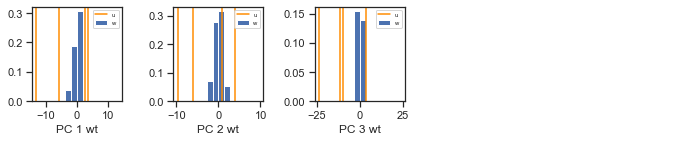

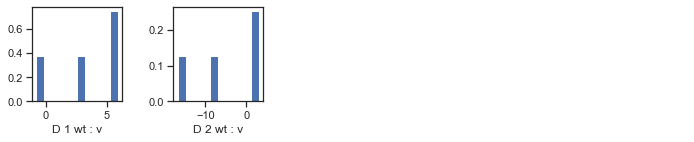

In [9]:
data.plot_K_weights()

Plotting up to 5 pairs. Change with parameter 'max_plots'


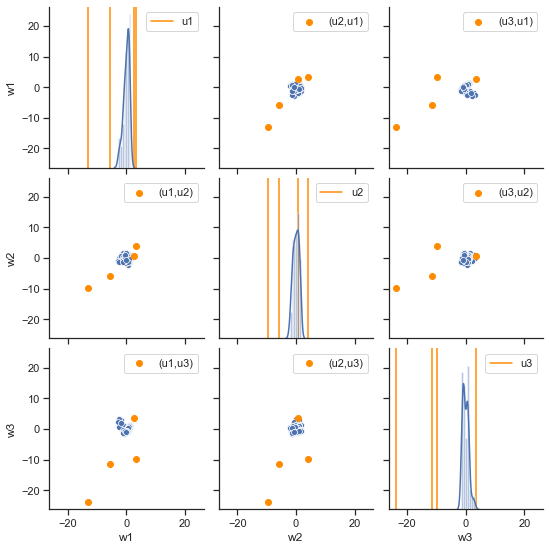

In [10]:
data.plot_u_w_pairs()

In [11]:
model = SepiaModel(data)
opt_prm, history, param_hist = model.optim_logPost(maxiter=10000,xatol=1,fatol=1)

lamWOs initialized outside default bounds [60, 1e5]; setting initial value to 1e5 - 1.
optimizing logpost over all parameters
Optimization terminated successfully.
         Current function value: -44492.070482
         Iterations: 1565
         Function evaluations: 2580
  param  init value  opt value
  theta    0.500000   0.518873
  theta    0.500000   0.516832
  betaV    0.100000   0.090025
  betaV    0.100000   0.154558
  betaU    0.100000   0.106552
  betaU    0.100000   0.141004
  betaU    0.100000   0.131584
  betaU    0.100000   0.089055
  betaU    0.100000   0.117789
  betaU    0.100000   0.127098
  betaU    0.100000   0.122302
  betaU    0.100000   0.131922
  betaU    0.100000   0.121274
  betaU    0.100000   0.057480
  betaU    0.100000   0.182475
  betaU    0.100000   0.007969
  lamVz    2.995732   2.034174
  lamUz    1.000000   0.300748
  lamUz    1.000000   1.122840
  lamUz    1.000000   0.302359
  lamWs    6.907755   9.105778
  lamWs    6.907755   5.964506
  lamWs    6.9

In [14]:
override=1
cachefile_name='ball_drop_2_ragged.pkl'
import os.path
import pickle
if os.path.isfile(cachefile_name) and override==0:
    model=pickle.load(open(cachefile_name, "rb" ))
else:
    model.tune_step_sizes(50, 20, update_vals=False)
    model.do_mcmc(2000)
    pickle.dump(model, open( cachefile_name, "w+b" ))

Step size tuning:   0%|          | 0/50 [00:00<?, ?it/s]

Starting tune_step_sizes...
Default step sizes:
theta
[[0.2 0.2]]
betaV
[[0.1]
 [0.1]]
betaU
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
lamVz
[[10.]]
lamUz
[[5. 5. 5.]]
lamWs
[[100. 100. 100.]]
lamWOs
[[100.]]
lamOs
[[19.51419672]]


MCMC sampling:   0%|          | 0/2000 [00:00<?, ?it/s]

Done with tune_step_size.
Selected step sizes:
theta
[[0.23316612 0.50806005]]
betaV
[[0.35939114]
 [0.31666566]]
betaU
[[0.21380387 0.04019031 0.39065703]
 [0.49355299 0.07177683 0.55538226]
 [0.08177698 0.20397849 0.50343993]
 [0.03401671 0.15645034 0.02898869]]
lamVz
[[6625.37101623]]
lamUz
[[0.29482512 0.35861446 0.51557984]]
lamWs
[[13352.10768355  9584.47628174  5508.19655215]]
lamWOs
[[169.68301082]]
lamOs
[[174.15724403]]


MCMC sampling: 100%|██████████| 2000/2000 [00:34<00:00, 57.28it/s]


In [49]:
samples_dict = model.get_samples()
p_stats = SepiaPlot.param_stats(samples_dict,theta_names,q1=.05,q2=.95,digits=4)
print(np.round(p_stats,4))

                      mean         sd  0.05 quantile  0.95 quantile
C                   0.2075     0.0458         0.1335         0.2807
g                   0.5003     0.0867         0.3632         0.6419
betaV_1             0.8785     2.0563         0.0011         5.3063
betaV_2             0.9839     2.2737         0.0022         5.0903
betaU_1             0.2383     0.1232         0.1027         0.4788
betaU_2             0.8331     0.3303         0.4227         1.4573
betaU_3             0.2159     0.0626         0.1298         0.3366
betaU_4             0.0742     0.0218         0.0469         0.1159
betaU_5             0.0540     0.0274         0.0215         0.1083
betaU_6             0.1085     0.0481         0.0501         0.1936
betaU_7             0.8837     0.1704         0.6496         1.1802
betaU_8             0.3523     0.0932         0.2378         0.5219
betaU_9             0.5855     0.2750         0.2793         1.1361
betaU_10            0.8374     0.4116         0.

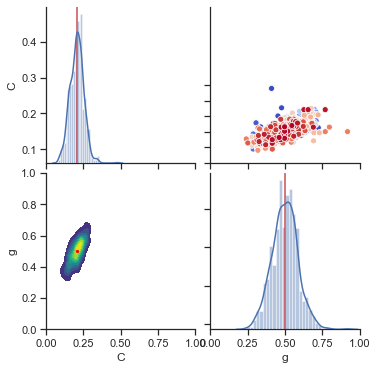

In [50]:
theta_names = ['C','g']
SepiaPlot.theta_pairs(samples_dict,theta_names,theta_ref=[[0.2075],[0.5003]])#,native=True,lims=[(0,1),(8.5,11.5)])
# theta_ref will plot lines on the theta histograms and a point corresponding to those lines on the contour plots

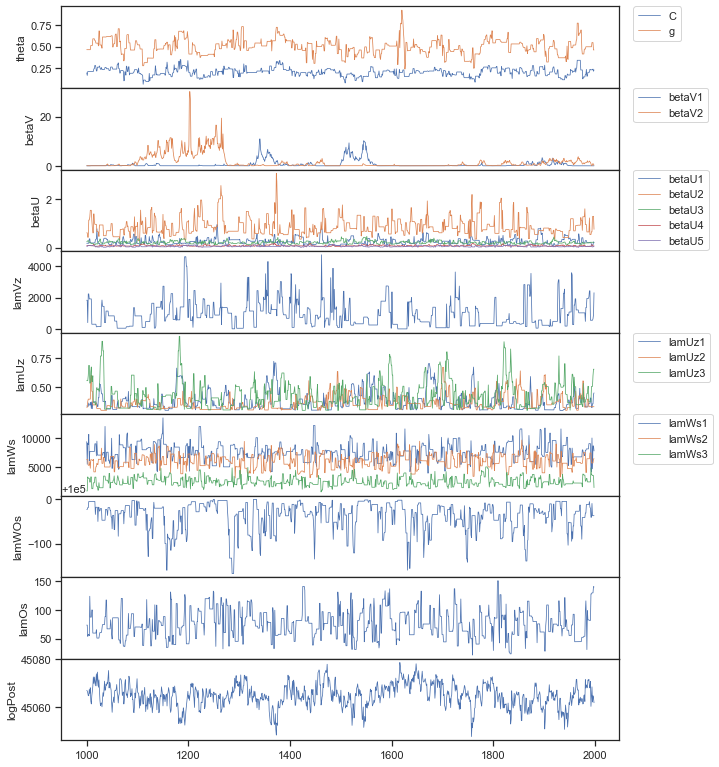

In [51]:
SepiaPlot.mcmc_trace(samples_dict,theta_names,start=1000,n_to_plot=1000,max_print=5)

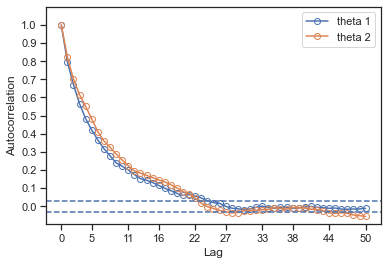

Effective Sample Sizes: [316, 289]
Total number of samples: [4000, 4000]


In [27]:
acf,sigline,ess = SepiaPlot.plot_acf(model,nlags=50,nburn=1000)

In [28]:
effective_samples = model.get_samples(nburn=1000,untransform_theta=True,effectivesamples=True)

Max effective sample size over thetas: 316
Total samples: 4000


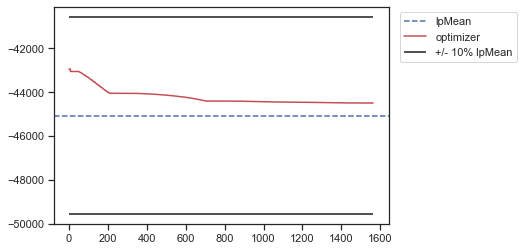

In [57]:
lpMean = np.mean(samples_dict['logPost'])
plt.hlines([-lpMean*1.1,-lpMean*.9],label='+/- 10% lpMean',xmin=0,xmax=len(history))
plt.axhline(-lpMean,c='b',linestyle='--',label='lpMean',xmin=0,xmax=len(history))
plt.plot(history,c='r',label='optimizer')
plt.legend(bbox_to_anchor=(1.4, 1))
plt.show()